In [1]:
#importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings  #To hide the warning messages
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 500) #To be able to see all the columns present in the dataset

#importing the dataset 'Leads.csv'
df = pd.read_csv('Leads.csv')
df.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened


#### Exploratory Data Analysis on the dataset

In [3]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [5]:
df.shape

(9240, 37)

We need to replace all the 'Yes' with 1, 'No' with 0. Also, many columns have value 'select'. These are the options which the user left blank. So we need to change them to null values.

In [6]:
#Replacing the 'Yes' with 1, 'No' with 0 and select with null values.
df = df.replace({'Yes':1,'No':0,'Select':np.nan})

In [7]:
#Checking the percentage of null values in all the columns
round(100*(df.isnull().sum())/df.shape[0],3)

Prospect ID                                       0.000
Lead Number                                       0.000
Lead Origin                                       0.000
Lead Source                                       0.390
Do Not Email                                      0.000
Do Not Call                                       0.000
Converted                                         0.000
TotalVisits                                       1.483
Total Time Spent on Website                       0.000
Page Views Per Visit                              1.483
Last Activity                                     1.115
Country                                          26.634
Specialization                                   36.580
How did you hear about X Education               78.463
What is your current occupation                  29.113
What matters most to you in choosing a course    29.318
Search                                            0.000
Magazine                                        

Our task is to find out which user/client/lead will be most likely to be converted into a paying user. But many columns in the dataset appears to be more useful for the marketing team of X Education and not to us. Let us remove those columns.

In [8]:
#Adding the names of all the columns which will not be of much use to perform the analysis to a list
col = ['Prospect ID','Country','How did you hear about X Education','Search','Magazine','Newspaper Article',
       'X Education Forums','Newspaper','Digital Advertisement','Update me on Supply Chain Content',
       'Lead Profile','City']
#Dropping all the columns whose names are present in the list 'col'
df.drop(columns=col, inplace=True)

In [9]:
df['Asymmetrique Activity Index'].head(3)

0    02.Medium
1    02.Medium
2    02.Medium
Name: Asymmetrique Activity Index, dtype: object

The columns Asymmetrique Activity Index and Asymmetrique Profile Index has values attached to a string. Let's retain only the numerical values.

In [10]:
#Retaining only numerical values by splitting the string from the numbers in Asymmetrique Activity Index and
# in Asymmetrique Profile Index
df['Asymmetrique Activity Index'] = pd.to_numeric(df['Asymmetrique Activity Index'].str.split('.').str[0])
df['Asymmetrique Profile Index'] = pd.to_numeric(df['Asymmetrique Profile Index'].str.split('.').str[0])

As many of the important columns has more than 30% null values, we should drop these columns but as these are important columns which we need for our model building, lets see if we can fill these with some suitable values.

As the columns 'TotalVisits' and 'Page Views Per Visit' has just around 1% null values, lets remove those rows.

In [11]:
df = df[~df['TotalVisits'].isnull()]
df = df[~df['Page Views Per Visit'].isnull()]

Visualizing the distribution of numerical columns.

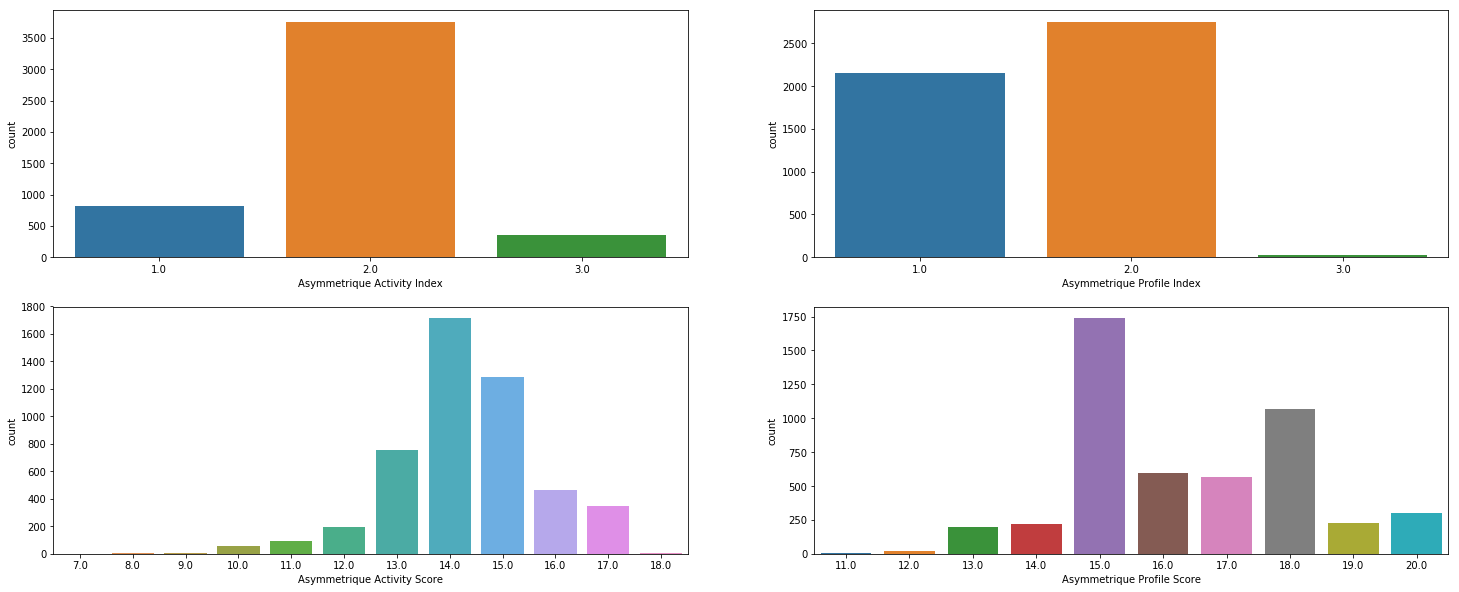

In [12]:
plt.figure(figsize=(25,10))
list1 = ['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score']
for i in range(len(list1)):
    plt.subplot(2,2,i+1)
    sns.countplot(df[list1[i]])

Asymmetrique Activity Score is similar to normal distribution but the rest 3 columns don't have any visible pattern. Inputting around 45% data each for 4 different rows might introduce high bias. So let's work with the remaining 55% data only.

In [13]:
#Checking percentage null values in each column again
round(100 * df.isnull().sum()/df.shape[0],2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.32
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     0.00
Specialization                                   36.30
What is your current occupation                  29.47
What matters most to you in choosing a course    29.68
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Tags                                             36.61
Lead Quality                                     51.95
Get updates on DM Content                         0.00
Asymmetriq

In [14]:
df.head(2)

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Get updates on DM Content,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Better Career Prospects,0,0,Interested in other courses,Low in Relevance,0,2.0,2.0,15.0,15.0,0,0,Modified
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,NaN,Unemployed,Better Career Prospects,0,0,Ringing,NaN,0,2.0,2.0,15.0,15.0,0,0,Email Opened


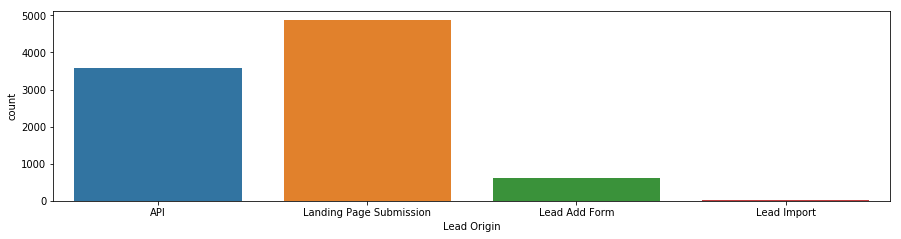

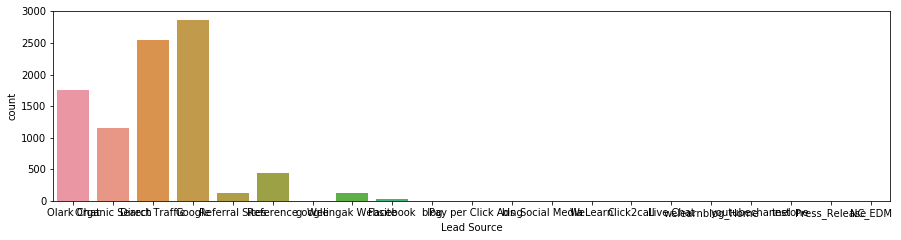

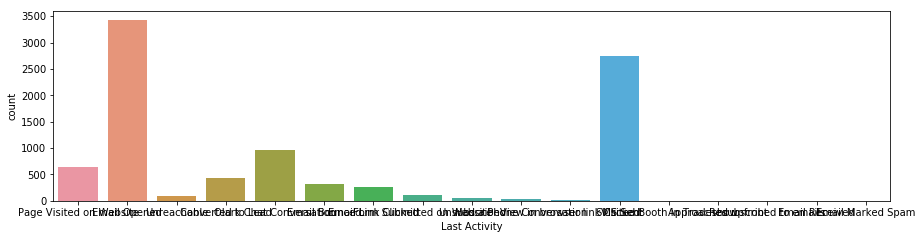

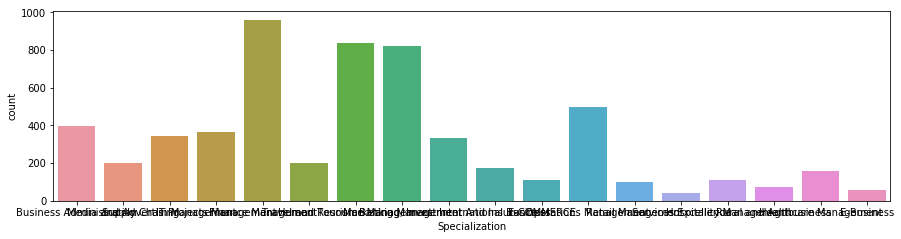

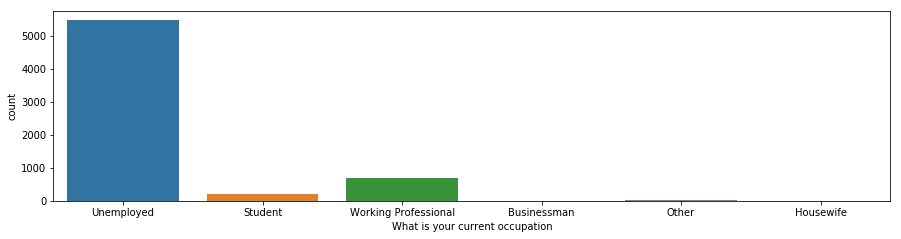

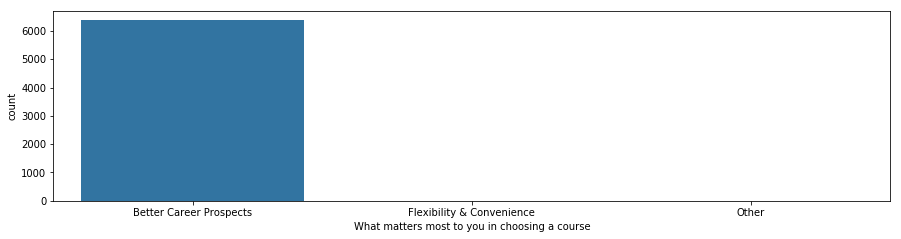

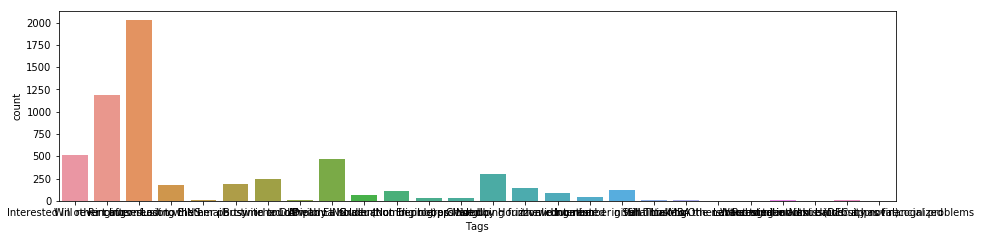

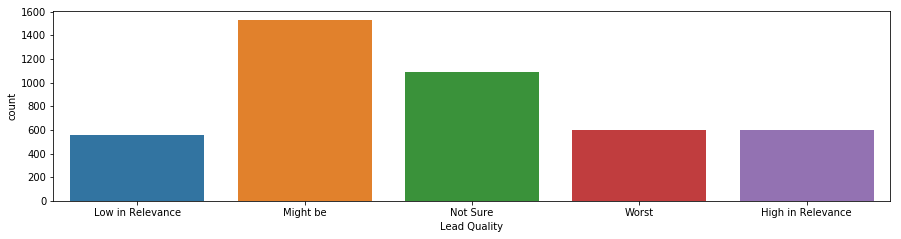

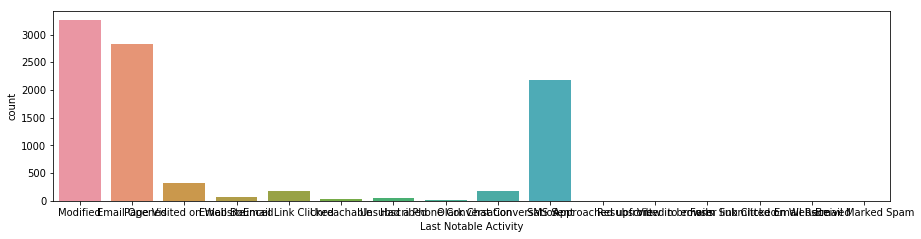

In [15]:
list1 = ['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation',
        'What matters most to you in choosing a course','Tags','Lead Quality','Last Notable Activity']

for i in list1:
    plt.figure(figsize=(15,3.5))
    sns.countplot(df[i])

In these categorical variables too, there doesn't seem any particular pattern to input the missing values. So rather than inputting wrongly assumed values, lets leave the null values alone and lets work on the values available.

In [16]:
df.shape

(9103, 25)

In [17]:
df['Total Time Spent on Website'].head()

0       0
1     674
2    1532
3     305
4    1428
Name: Total Time Spent on Website, dtype: int64

The values of the column 'Total Time Spent on Website' are most probably in seconds as it is highly unlikely that someone spent 674 minutes or hours on the website. So lets convert them into minutes

In [18]:
df['Total Time Spent on Website'] = round(df['Total Time Spent on Website']/60,0)
df = df.rename(columns={'Total Time Spent on Website':'Total Time Spent on Website_in minutes'})

In [19]:
df.head(2)

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website_in minutes,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Get updates on DM Content,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.0,0.0,0.0,Page Visited on Website,NaN,Unemployed,Better Career Prospects,0,0,Interested in other courses,Low in Relevance,0,2.0,2.0,15.0,15.0,0,0,Modified
1,660728,API,Organic Search,0,0,0,5.0,11.0,2.5,Email Opened,NaN,Unemployed,Better Career Prospects,0,0,Ringing,NaN,0,2.0,2.0,15.0,15.0,0,0,Email Opened


Lets check for outliers in the dataset.

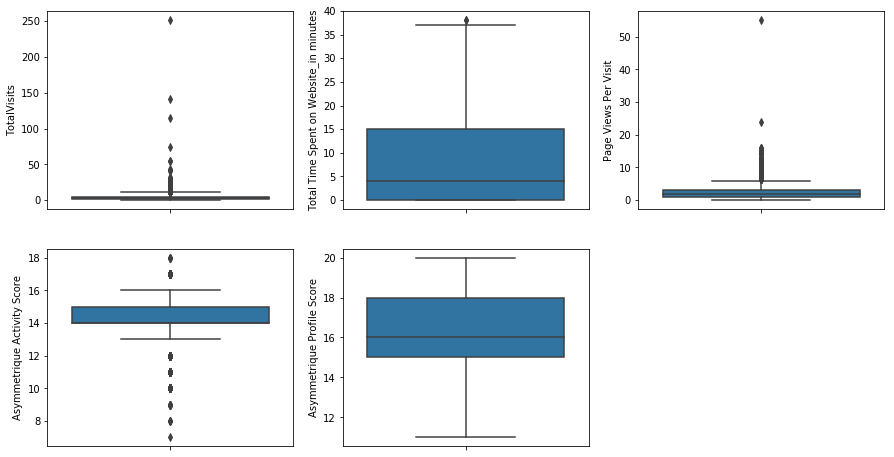

In [20]:
#Adding all the numerical columns in a list and the plotting a boxplot
list1 = ['TotalVisits','Total Time Spent on Website_in minutes','Page Views Per Visit','Asymmetrique Activity Score',
        'Asymmetrique Profile Score']
plt.figure(figsize=(15,8))
for i in range(len(list1)):
    plt.subplot(2,3,i+1)
    sns.boxplot(y = df[list1[i]])

In [21]:
df.shape

(9103, 25)

While we will remove outliers, the null value rows will also be eliminated along with them.

In [22]:
#Removing the outliers in TotalVisits column.
Q1 = df['TotalVisits'].quantile(0.25)
Q3 = df['TotalVisits'].quantile(0.75)
IQR = Q3 - Q1
#As outliers lie only on the upper side of the boxplot of TotalVisits, we will remove only those
df = df[df['TotalVisits'] < (Q3+(1.5*IQR))]

In [23]:
df.shape

(8750, 25)

In [24]:
#Removing the outliers in Page Views Per Visit column
Q1 = df['Page Views Per Visit'].quantile(0.25)
Q3 = df['Page Views Per Visit'].quantile(0.75)
IQR = Q3 - Q1
#As outliers lie only on the lower side of the boxplot, we will remove only those
df = df[(df['Page Views Per Visit'] <= Q3+(1.5*IQR))]

In [25]:
df.shape

(8599, 25)

In [26]:
#Removing the outliers in Page Views Per Visit column
Q1 = df['Asymmetrique Activity Score'].quantile(0.25)
Q3 = df['Asymmetrique Activity Score'].quantile(0.75)
IQR = Q3 - Q1
#Removing outliers present on both sides
df = df.loc[(df['Asymmetrique Activity Score'] > Q1-(1.5*IQR)) & (df['Asymmetrique Activity Score'] < Q3+(1.5*IQR))]

In [27]:
df.shape

(3959, 25)

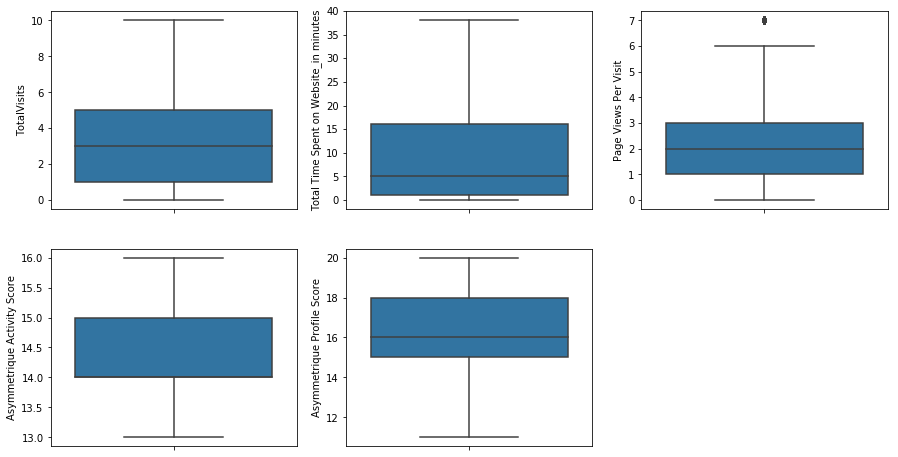

In [28]:
plt.figure(figsize=(15,8))
for i in range(len(list1)):
    plt.subplot(2,3,i+1)
    sns.boxplot(y = df[list1[i]])

Almost all the outliers have been removed from the dataframe along with the null values present in numerical variables.

In [29]:
round(100*df.isnull().sum()/df.shape[0],2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.35
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website_in minutes            0.00
Page Views Per Visit                              0.00
Last Activity                                     0.00
Specialization                                   34.15
What is your current occupation                  25.71
What matters most to you in choosing a course    25.79
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Tags                                             32.36
Lead Quality                                     48.90
Get updates on DM Content                         0.00
Asymmetriq

We are left with 3959 rows to build our model.

Creating dummy variables for the categorical variables to convert them from categorical to numerical variables for our model building.

In [30]:
df.head(2)

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website_in minutes,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Get updates on DM Content,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.0,0.0,0.0,Page Visited on Website,NaN,Unemployed,Better Career Prospects,0,0,Interested in other courses,Low in Relevance,0,2.0,2.0,15.0,15.0,0,0,Modified
1,660728,API,Organic Search,0,0,0,5.0,11.0,2.5,Email Opened,NaN,Unemployed,Better Career Prospects,0,0,Ringing,NaN,0,2.0,2.0,15.0,15.0,0,0,Email Opened


In [31]:
# Adding the categorical variables to a list
list1 = ['Specialization','What is your current occupation','Lead Quality','Lead Origin','Lead Source','Last Activity','Tags',
        'What matters most to you in choosing a course','Last Notable Activity']

# Creating a dummy variable for the variable present in list1 and dropping the first one.
for i in list1:
    cont = pd.get_dummies(df[i],prefix=i,drop_first=True)
    #Adding the results to the master dataframe
    df = pd.concat([df,cont],axis=1)

# Dropping the initial categorical variables present in list1
df.drop(columns=list1, inplace=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3959 entries, 0 to 9239
Columns: 111 entries, Lead Number to Last Notable Activity_Unsubscribed
dtypes: float64(7), int64(9), uint8(95)
memory usage: 893.1 KB


In [33]:
# Checking the percentage null values again
round(100*(df.isnull().sum())/df.shape[0],3)

Lead Number                                               0.0
Do Not Email                                              0.0
Do Not Call                                               0.0
Converted                                                 0.0
TotalVisits                                               0.0
Total Time Spent on Website_in minutes                    0.0
Page Views Per Visit                                      0.0
Through Recommendations                                   0.0
Receive More Updates About Our Courses                    0.0
Get updates on DM Content                                 0.0
Asymmetrique Activity Index                               0.0
Asymmetrique Profile Index                                0.0
Asymmetrique Activity Score                               0.0
Asymmetrique Profile Score                                0.0
I agree to pay the amount through cheque                  0.0
A free copy of Mastering The Interview                    0.0
Speciali

We do not have any null values in any of the columns of our dataframe. Lets proceed with splitting the data into test and train.

## Splitting the data

In [34]:
# Importing the required library to perform the test_train_split
from sklearn.model_selection import train_test_split

In [35]:
# Putting feature variables in X
X = df.drop(columns=['Lead Number','Converted'])

#Putting the response variable in y
y = df[['Lead Number','Converted']]

In [36]:
# Performing the train_test_split with 70% of data for training set and 30% data for test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state = 100)

In [37]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website_in minutes,Page Views Per Visit,Through Recommendations,Receive More Updates About Our Courses,Get updates on DM Content,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_Visited Booth in Tradeshow,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
1068,0,0,3.0,30.0,3.0,0,0,0,2.0,1.0,15.0,17.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1855,0,0,2.0,6.0,2.0,0,0,0,2.0,2.0,14.0,15.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
727,0,0,5.0,22.0,2.5,0,0,0,2.0,1.0,14.0,18.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

## Scaling the train set

In [38]:
# Importing the StandardScaler library from the sklearn
from sklearn.preprocessing import StandardScaler

# Selecting the columns which needs to be scaled.
col_scale = ['TotalVisits','Total Time Spent on Website_in minutes','Page Views Per Visit','Asymmetrique Activity Index',
       'Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score']

# Creating an instance of StandardScaler() and scaling the columns in X_train
scaler = StandardScaler()
X_train[col_scale] = scaler.fit_transform(X_train[col_scale])


In [39]:
# Exploring the scaled data
X_train.describe()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website_in minutes,Page Views Per Visit,Through Recommendations,Receive More Updates About Our Courses,Get updates on DM Content,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_Visited Booth in Tradeshow,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
count,2771.000000,2771.000000,2.771000e+03,2.771000e+03,2.771000e+03,2771.0,2771.0,2771.0,2.771000e+03,2.771000e+03,2.771000e+03,2.771000e+03,2771.0,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000,2771.0,2771.0

Checking for high correlation between any columns in the dataset by plotting correlation matrix.

In [40]:
X_train.corr()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website_in minutes,Page Views Per Visit,Through Recommendations,Receive More Updates About Our Courses,Get updates on DM Content,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_Visited Booth in Tradeshow,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
Do Not Email,1.000000,-0.004993,-0.060764,-0.066311,-0.024813,NaN,NaN,NaN,0.045273,-0.024810,-0.042680,-0.014123,NaN,0.037407,0.052782,-0.005063,-0.004220,-0.012236,0.005121,0.012819,-0.023002,0.038474,0.020607,-0.012124,-0.000050,-0.024030,-0.004990,-0.025074,0.073359,-0.019459,0.042600,-0.007063,0.023420,-0.010534,-0.020207,-0.048378,-0.056982,-0.057422,0.045605,0.117915,0.061710,0.006100,-0.023509,0.076484,-0.022964,-0.080955,-0.007063,-0.004993,-0.010275,0.018376,-0.004993,-0.024962,0.014424,-0.007063,-0.004993,0.022329,-0.004993,NaN,0.047603,-0.062867,0.647128,-0.038234,NaN,-0.227990,-0.004993,-0.005740,-0.018726,-0.035861,0.002440,0.022004,0.016434,0.289995,NaN,-0.018421,-0.0

In [41]:
# Dropping the highly correlated column to reduce multicollinearity in the dataset.
X_train = X_train.drop(columns=['TotalVisits','Asymmetrique Activity Index','Asymmetrique Profile Index'])

Therefore, no high correlation visibly present between any 2 columns.

In [42]:
X_train.shape

(2771, 106)

Therfore we have 2771 rows in our training dataset with 106 columns in X_train

# Building Logistic Regression Model

In [43]:
# Importing statsmodel library
import statsmodels.api as sm

In [44]:
# Building our first Logistic regression model on the training dataset
logm1 = sm.GLM(y_train['Converted'],(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2771
Model:                            GLM   Df Residuals:                     2676
Model Family:                Binomial   Df Model:                           94
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 18 Nov 2019   Deviance:                          nan
Time:                        22:53:05   Pearson chi2:                 1.36e+18
No. Iterations:                   100   Covariance Type:             nonrobust
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                   -8.96e+14   6.29e+07  -1.43e+07      0.000   -8.96e+14   -8.96e+14
Do Not Email                                           -6.146e+14   7.74e+06  -7.94e+07      0.000   -6.15e+14   -6.15e+14
Do Not Call                                             1.063e+16   6.77e+07   1.57e+08      0.000    1.06e+16    1.06e+16
Total Time Spent on Website_in minutes                  3.579e+14   1.55e+06    2.3e+08      0.000    3.58e+14    3.58e+14
Page Views Per Visit                                    1.713e+13   1.95e+06   8.78e+06      0.000    1.71e+13    1.71e+13
Through Recommendations                                   91.2275   9.91e-07   9.21e+07      0.000      91.227      91.227
Receive More Updates About Our Courses                  -108.5354   6.18e-07  -1.76e+08      0.000    -108.535    -108.535
Get updates on DM Content                                -19.2310    1.5e-06  -1.28e+07      0.000     -19.231     -19.231
Asymmetrique Activity Score                              2.33e+14   1.57e+06   1.49e+08      0.000    2.33e+14    2.33e+14
Asymmetrique Profile Score                             -1.433e+14   2.55e+06  -5.62e+07      0.000   -1.43e+14   -1.43e+14
I agree to pay the amount through cheque                  49.7748   7.12e-07   6.99e+07      0.000      49.775      49.775
A free copy of Mastering The Interview                 -4.455e+13    4.2e+06  -1.06e+07      0.000   -4.46e+13   -4.46e+13
Specialization_Business Administration                  2.933e+14   7.06e+06   4.15e+07      0.000    2.93e+14    2.93e+14
Specialization_E-Business                               2.024e+14   1.57e+07   1.29e+07      0.000    2.02e+14    2.02e+14
Specialization_E-COMMERCE                              -1.254e+14   1.25e+07     -1e+07      0.000   -1.25e+14   -1.25e+14
Specialization_Finance Management                      -2.336e+13    5.6e+06  -4.17e+06      0.000   -2.34e+13   -2.34e+13
Specialization_Healthcare Management                     8.57e+12    1.2e+07   7.12e+05      0.000    8.57e+12    8.57e+12
Specialization_Hospitality Management                  -6.245e+14   1.32e+07  -4.74e+07      0.000   -6.24e+14   -6.24e+14
Specialization_Human Resource Management               -2.784e+13   5.73e+06  -4.86e+06      0.000   -2.78e+13   -2.78e+13
Specialization_IT Projects Management                  -3.626e+14   8.36e+06  -4.34e+07      0.000   -3.63e+14   -3.63e+14
Specialization_International Business                  -2.149e+14   9.54e+06  -2.25e+07      0.000   -2.15e+14   -2.15e+14
Specialization_Marketing Management                     1.998e+14   5.75e+06   3.47e+07      0.000       2e+14       2e+14
Specialization_Media and Advertising                    7.798e+11   9.46e+06   8.25e+04

As we have a lot of columns present, we will use Recursive Feature Elimination (RFE) to select the top 15 columns for our Logistic Regression Model.

### Feature Selection using RFE

In [45]:
# Importing the LogisticRegression library from sklearn
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [46]:
# Importing RFE library from sklearn
from sklearn.feature_selection import RFE

# Running RFE to select the top 15 features
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train['Converted'])

In [47]:
# To check the ranking of each column in terms of being selected for LogReg model
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 4),
 ('Do Not Call', False, 79),
 ('Total Time Spent on Website_in minutes', False, 14),
 ('Page Views Per Visit', False, 72),
 ('Through Recommendations', False, 86),
 ('Receive More Updates About Our Courses', False, 84),
 ('Get updates on DM Content', False, 83),
 ('Asymmetrique Activity Score', False, 11),
 ('Asymmetrique Profile Score', False, 69),
 ('I agree to pay the amount through cheque', False, 85),
 ('A free copy of Mastering The Interview', False, 68),
 ('Specialization_Business Administration', False, 20),
 ('Specialization_E-Business', False, 55),
 ('Specialization_E-COMMERCE', False, 62),
 ('Specialization_Finance Management', False, 81),
 ('Specialization_Healthcare Management', False, 54),
 ('Specialization_Hospitality Management', False, 8),
 ('Specialization_Human Resource Management', False, 66),
 ('Specialization_IT Projects Management', False, 58),
 ('Specialization_International Business', False, 53),
 ('Specialization_Marketing Manageme

In [48]:
# Selecting all the 15 columns provided by RFE from X_train
col = X_train.columns[rfe.support_]
col

Index(['What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Lead Quality_Worst', 'Lead Source_Welingak Website',
       'Tags_Closed by Horizzon', 'Tags_Interested  in full time MBA',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_opp hangup', 'Tags_switched off', 'Tags_wrong number given'],
      dtype='object')

In [49]:
# Building our 2nd LogReg model with the selected 15 features.
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train['Converted'],X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2771
Model:                            GLM   Df Residuals:                     2755
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -650.54
Date:                Mon, 18 Nov 2019   Deviance:                       1301.1
Time:                        22:53:08   Pearson chi2:                 3.16e+03
No. Iterations:                    24   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9820      0.114    -17.394      0.000      -2.205      -1.759
What is your current occupation_Unemployed               2.2038      0.157     14.057      0.000       1.897       2.511
What is your current occupation_Working Professional     2.3601      0.482      4.901      0.000       1.416       3.304
Lead Quality_Worst                                      -4.6243      0.930     -4.974      0.000      -6.446      -2.802
Lead Source_Welingak Website                            24.6806   2.69e+04      0.001      0.999   -5.27e+04    5.28e+04
Tags_Closed by Horizzon                                  5.1605      1.089      4.738      0.000       3.026       7.295
Tags_Interested  in full time MBA                       -2.8853      0.741     -3.893      0.000      -4.338      -1.433
Tags_Interested in other courses                        -3.9291      0.518     -7.581      0.000      -4.945      -2.913
Tags_Lost to EINS                                        5.8916      1.160      5.078      0.000       3.618       8.166
Tags_Not doing further education                       -24.7621   2.88e+04     -0.001      0.999   -5.64e+04    5.64e+04
Tags_Ringing                                            -3.9204      0.355    -11.029      0.000      -4.617      -3.224
Tags_Will revert after reading the email                 3.4851      0.260     13.400      0.000       2.975       3.995
Tags_invalid number                                    -25.4956   4.98e+04     -0.001      1.000   -9.77e+04    9.76e+04
Tags_opp hangup                                         -2.6226      1.050     -2.497      0.013      -4.681      -0.564
Tags_switched off                                       -3.7333      0.726     -5.140      0.000      -5.157      -2.310
Tags_wrong number given                                -25.6877    5.3e+04     -0.000      1.000   -1.04e+05    1.04e+05
========================================================================================================================
"""

We will drop all the features which have P value greater than 0.05 or 5% as they are statistically insignificant.

In [50]:
col = col.drop('Tags_invalid number')

In [51]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train['Converted'],X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2771
Model:                            GLM   Df Residuals:                     2756
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -661.56
Date:                Mon, 18 Nov 2019   Deviance:                       1323.1
Time:                        22:53:08   Pearson chi2:                 3.13e+03
No. Iterations:                    24   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9856      0.114    -17.395      0.000      -2.209      -1.762
What is your current occupation_Unemployed               2.1142      0.155     13.624      0.000       1.810       2.418
What is your current occupation_Working Professional     2.3050      0.482      4.786      0.000       1.361       3.249
Lead Quality_Worst                                      -4.5879      0.927     -4.947      0.000      -6.405      -2.770
Lead Source_Welingak Website                            24.7615   2.67e+04      0.001      0.999   -5.24e+04    5.24e+04
Tags_Closed by Horizzon                                  5.2219      1.088      4.799      0.000       3.089       7.355
Tags_Interested  in full time MBA                       -2.7964      0.741     -3.774      0.000      -4.249      -1.344
Tags_Interested in other courses                        -3.8394      0.518     -7.416      0.000      -4.854      -2.825
Tags_Lost to EINS                                        5.9299      1.164      5.095      0.000       3.649       8.211
Tags_Not doing further education                       -24.6711   2.88e+04     -0.001      0.999   -5.65e+04    5.64e+04
Tags_Ringing                                            -3.8274      0.355    -10.793      0.000      -4.522      -3.132
Tags_Will revert after reading the email                 3.5544      0.259     13.732      0.000       3.047       4.062
Tags_opp hangup                                         -2.5294      1.050     -2.409      0.016      -4.587      -0.472
Tags_switched off                                       -3.6401      0.726     -5.015      0.000      -5.063      -2.217
Tags_wrong number given                                -25.5942    5.3e+04     -0.000      1.000   -1.04e+05    1.04e+05
========================================================================================================================
"""

In [52]:
col = col.drop('Tags_wrong number given')

In [53]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train['Converted'],X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2771
Model:                            GLM   Df Residuals:                     2757
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -672.60
Date:                Mon, 18 Nov 2019   Deviance:                       1345.2
Time:                        22:53:08   Pearson chi2:                 3.10e+03
No. Iterations:                    23   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9891      0.114    -17.395      0.000      -2.213      -1.765
What is your current occupation_Unemployed               2.0264      0.154     13.180      0.000       1.725       2.328
What is your current occupation_Working Professional     2.2508      0.482      4.673      0.000       1.307       3.195
Lead Quality_Worst                                      -4.5331      0.929     -4.879      0.000      -6.354      -2.712
Lead Source_Welingak Website                            23.8405   1.61e+04      0.001      0.999   -3.16e+04    3.16e+04
Tags_Closed by Horizzon                                  5.2784      1.086      4.862      0.000       3.150       7.406
Tags_Interested  in full time MBA                       -2.7098      0.741     -3.658      0.000      -4.162      -1.258
Tags_Interested in other courses                        -3.7519      0.517     -7.253      0.000      -4.766      -2.738
Tags_Lost to EINS                                        5.9582      1.166      5.109      0.000       3.673       8.244
Tags_Not doing further education                       -23.5860   1.75e+04     -0.001      0.999   -3.44e+04    3.43e+04
Tags_Ringing                                            -3.7366      0.354    -10.560      0.000      -4.430      -3.043
Tags_Will revert after reading the email                 3.6229      0.258     14.060      0.000       3.118       4.128
Tags_opp hangup                                         -2.4384      1.050     -2.323      0.020      -4.496      -0.381
Tags_switched off                                       -3.5489      0.725     -4.892      0.000      -4.971      -2.127
========================================================================================================================
"""

In [54]:
col = col.drop('Lead Source_Welingak Website')

In [55]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train['Converted'],X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2771
Model:                            GLM   Df Residuals:                     2758
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -693.65
Date:                Mon, 18 Nov 2019   Deviance:                       1387.3
Time:                        22:53:09   Pearson chi2:                 3.24e+03
No. Iterations:                    23   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9832      0.114    -17.396      0.000      -2.207      -1.760
What is your current occupation_Unemployed               2.1904      0.151     14.534      0.000       1.895       2.486
What is your current occupation_Working Professional     2.3455      0.481      4.873      0.000       1.402       3.289
Lead Quality_Worst                                      -4.6639      0.924     -5.045      0.000      -6.476      -2.852
Tags_Closed by Horizzon                                  5.2174      1.088      4.797      0.000       3.085       7.349
Tags_Interested  in full time MBA                       -2.8704      0.740     -3.879      0.000      -4.321      -1.420
Tags_Interested in other courses                        -3.9146      0.516     -7.580      0.000      -4.927      -2.902
Tags_Lost to EINS                                        5.9260      1.164      5.092      0.000       3.645       8.207
Tags_Not doing further education                       -23.7394   1.74e+04     -0.001      0.999   -3.41e+04     3.4e+04
Tags_Ringing                                            -3.9057      0.353    -11.077      0.000      -4.597      -3.215
Tags_Will revert after reading the email                 3.5040      0.258     13.590      0.000       2.999       4.009
Tags_opp hangup                                         -2.6079      1.049     -2.486      0.013      -4.664      -0.551
Tags_switched off                                       -3.7187      0.725     -5.130      0.000      -5.139      -2.298
========================================================================================================================
"""

In [56]:
col = col.drop('Tags_Not doing further education')

In [57]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train['Converted'],X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2771
Model:                            GLM   Df Residuals:                     2759
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -709.30
Date:                Mon, 18 Nov 2019   Deviance:                       1418.6
Time:                        22:53:09   Pearson chi2:                 3.26e+03
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9879      0.114    -17.397      0.000      -2.212      -1.764
What is your current occupation_Unemployed               2.0847      0.149     13.976      0.000       1.792       2.377
What is your current occupation_Working Professional     2.2785      0.482      4.731      0.000       1.335       3.222
Lead Quality_Worst                                      -4.7628      0.897     -5.310      0.000      -6.521      -3.005
Tags_Closed by Horizzon                                  5.3274      1.096      4.860      0.000       3.179       7.476
Tags_Interested  in full time MBA                       -2.7645      0.740     -3.737      0.000      -4.214      -1.315
Tags_Interested in other courses                        -3.8080      0.516     -7.381      0.000      -4.819      -2.797
Tags_Lost to EINS                                        6.0486      1.179      5.130      0.000       3.738       8.360
Tags_Ringing                                            -3.7957      0.352    -10.790      0.000      -4.485      -3.106
Tags_Will revert after reading the email                 3.5884      0.257     13.981      0.000       3.085       4.091
Tags_opp hangup                                         -2.4972      1.049     -2.381      0.017      -4.553      -0.441
Tags_switched off                                       -3.6083      0.724     -4.981      0.000      -5.028      -2.188
========================================================================================================================
"""

Now we have a good LogReg model with all statistically significant variables. So lets look at VIF values to check the multicollinearity

In [58]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,What is your current occupation_Working Profes...,1.72
5,Tags_Interested in other courses,1.32
3,Tags_Closed by Horizzon,1.26
2,Lead Quality_Worst,1.15
10,Tags_switched off,1.14
4,Tags_Interested in full time MBA,1.08
6,Tags_Lost to EINS,1.05
9,Tags_opp hangup,1.03
8,Tags_Will revert after reading the email,0.73
7,Tags_Ringing,0.56


Therefore the VIF values of all the variables are low enough. Now lets predict values of our response variable.

In [59]:
# Finding the probability value using res.predict()
y_train_pred = res.predict(X_train_sm)

#reshaping the y_train_pred
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.97552095, 0.02386331, 0.99561074, 0.97552095, 0.02898551,
       0.97552095, 0.02415256, 0.12047416, 0.08313985, 0.02415256])

In [60]:
y_train_pred_final = pd.DataFrame({'Lead Number':y_train['Lead Number'], 'Converted':y_train['Converted'].values, 'Score':y_train_pred*100})
y_train_pred_final.head()

,Lead Number,Converted,Score
1068,648670,1,97.552095
1855,641510,0,2.386331
727,652926,1,99.561074
1857,641495,1,97.552095
875,651241,0,2.898551


### Finding Optimal Cut-off point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [61]:
from sklearn import metrics

In [62]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)*10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Score.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Lead Number,Converted,Score,0.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0
1068,648670,1,97.552095,1,1,1,1,1,1,1,1,1,1
1855,641510,0,2.386331,1,0,0,0,0,0,0,0,0,0
727,652926,1,99.561074,1,1,1,1,1,1,1,1,1,1
1857,641495,1,97.552095,1,1,1,1,1,1,1,1,1,1
875,651241,0,2.898551,1,0,0,0,0,0,0,0,0,0


In [63]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy     sensi     speci
0.0    0.0  0.425839  1.000000  0.000000
10.0  10.0  0.697582  0.984746  0.484601
20.0  20.0  0.891014  0.917797  0.871150
30.0  30.0  0.891375  0.917797  0.871779
40.0  40.0  0.891375  0.917797  0.871779
50.0  50.0  0.891375  0.917797  0.871779
60.0  60.0  0.880549  0.738136  0.986172
70.0  70.0  0.880188  0.737288  0.986172
80.0  80.0  0.879105  0.734746  0.986172
90.0  90.0  0.870083  0.713559  0.986172


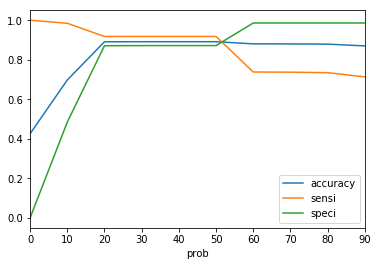

In [64]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

Therefore 54% should be the optimal cut-off point.

In [65]:
# Creating a new column 'predicted' which will be our model's prediction whether lead converted or not.
y_train_pred_final['predicted'] = y_train_pred_final.Score.map( lambda x: 1 if x > 54 else 0)

y_train_pred_final.head()

,Lead Number,Converted,Score,0.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,predicted
1068,648670,1,97.552095,1,1,1,1,1,1,1,1,1,1,1
1855,641510,0,2.386331,1,0,0,0,0,0,0,0,0,0,0
727,652926,1,99.561074,1,1,1,1,1,1,1,1,1,1,1
1857,641495,1,97.552095,1,1,1,1,1,1,1,1,1,1,1
875,651241,0,2.898551,1,0,0,0,0,0,0,0,0,0,0


In [66]:
# Let's check the overall accuracy of our model on train set.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8812702995308553

Therefore our model is predicting with an accuracy of 88%.

###### Drawing ROC Curve

In [67]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [68]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Score, drop_intermediate = False )

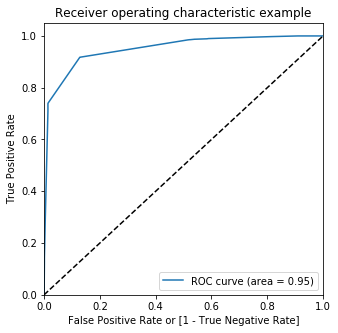

In [69]:
draw_roc(y_train_pred_final['Converted'], y_train_pred_final['Score'])

As the ROC curve is near to left hand border and away from 45 degree line, our model is accurate enough with ROC curve area of 0.95.

In [70]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[1568,   23],
       [ 306,  874]], dtype=int64)

In [71]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [72]:
# Let's see the sensitivity of our logistic regression model
sensitivity = TP / float(TP+FN)
sensitivity

0.7406779661016949

In [73]:
# Let us calculate specificity
specificity = TN / float(TN+FP)
specificity

0.9855436832181018

In [74]:
# Let's check the overall accuracy of our model on train set.
accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
accuracy

0.8812702995308553

##### Finding Precision and Recall Values

In [75]:
precision = confusion[1,1]/(confusion[0,1]+confusion[1,1])
precision

0.9743589743589743

In [76]:
recall = confusion[1,1]/(confusion[1,0]+confusion[1,1])
recall

0.7406779661016949

#### We got a 97% lead conversion ratio up from 30% before.

## Predicting on Test set

In [77]:
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website_in minutes,Page Views Per Visit,Through Recommendations,Receive More Updates About Our Courses,Get updates on DM Content,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_Visited Booth in Tradeshow,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
1224,0,0,2.0,7.0,2.0,0,0,0,2.0,2.0,13.0,15.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1187,1,0,5.0,6.0,5.0,0,0,0,2.0,2.0,14.0,15.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2594,0,0,2.0,20.0,2.0,0,0,0,2.0,1.0,14.0,19.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,

In [78]:
y_test.head()

,Lead Number,Converted
1224,646858,0
1187,647448,0
2594,634647,1
1845,641602,1
431,655736,0


In [79]:
#Scaling the columns from col_scale list in X_test
X_test[col_scale] = scaler.transform(X_test[col_scale])

#Selecting the features present in col list.
X_test = X_test[col]
X_test.head()

,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Quality_Worst,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_opp hangup,Tags_switched off
1224,0,0,0,0,0,0,0,0,0,0,0
1187,0,0,0,0,0,0,0,0,0,0,0
2594,1,0,0,0,0,0,0,0,1,0,0
1845,1,0,0,0,0,0,0,0,1,0,0
431,0,0,0,0,0,0,0,0,0,0,0


In [80]:
#Adding constant variable to the X_test
X_test_sm = sm.add_constant(X_test)

#Storing the values predicted by our model
y_test_pred = res.predict(X_test_sm)
y_test_pred.head()

1224    0.120474
1187    0.120474
2594    0.975521
1845    0.975521
431     0.120474
dtype: float64

In [81]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test, y_pred_1*100],axis=1)

In [82]:
y_pred_final.head()

,Lead Number,Converted,0
1224,646858,0,12.047416
1187,647448,0,12.047416
2594,634647,1,97.552095
1845,641602,1,97.552095
431,655736,0,12.047416


In [83]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Score'})

In [84]:
# Predicting the lead conversion based on Score values
y_pred_final['predicted'] = y_pred_final.Score.map(lambda x: 1 if x > 54 else 0)

In [85]:
y_pred_final.head()

,Lead Number,Converted,Score,predicted
1224,646858,0,12.047416,0
1187,647448,0,12.047416,0
2594,634647,1,97.552095,1
1845,641602,1,97.552095,1
431,655736,0,12.047416,0


In [86]:
# Let's check the overall accuracy.
accuracy = metrics.accuracy_score(y_pred_final.Converted, y_pred_final.predicted)

In [87]:
#Creating the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.predicted )
confusion2

array([[676,  10],
       [144, 358]], dtype=int64)

In [88]:
#Calculating True Positive, True Negative, False Positive and False Negative
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [89]:
# Calculating sensitivity
sensitivity = TP / float(TP+FN) #also called recall
sensitivity 

0.7131474103585658

In [90]:
# Calculating specificity
specificity = TN / float(TN+FP)
specificity

0.9854227405247813

In [91]:
# Calculating Precision
precision = TP/(FP+TP)
precision

0.9728260869565217

#### The Lead Conversion rate on the test dataset is around 97%.